#1. CNN
## 1-1. MLP(Multi Layer Perceptron)의 한계
- 2차원 구조의 영상을 1차원으로 변환하여 입력. 적지 않은 정보 손실로 인한
성능 저하


## 1-2. Convolutional Neural Network
- 이미지·영상·시계열 데이터 같은 공간적/지역적 패턴을 가진 데이터를 처리하는 데 특화된 딥러닝 모델

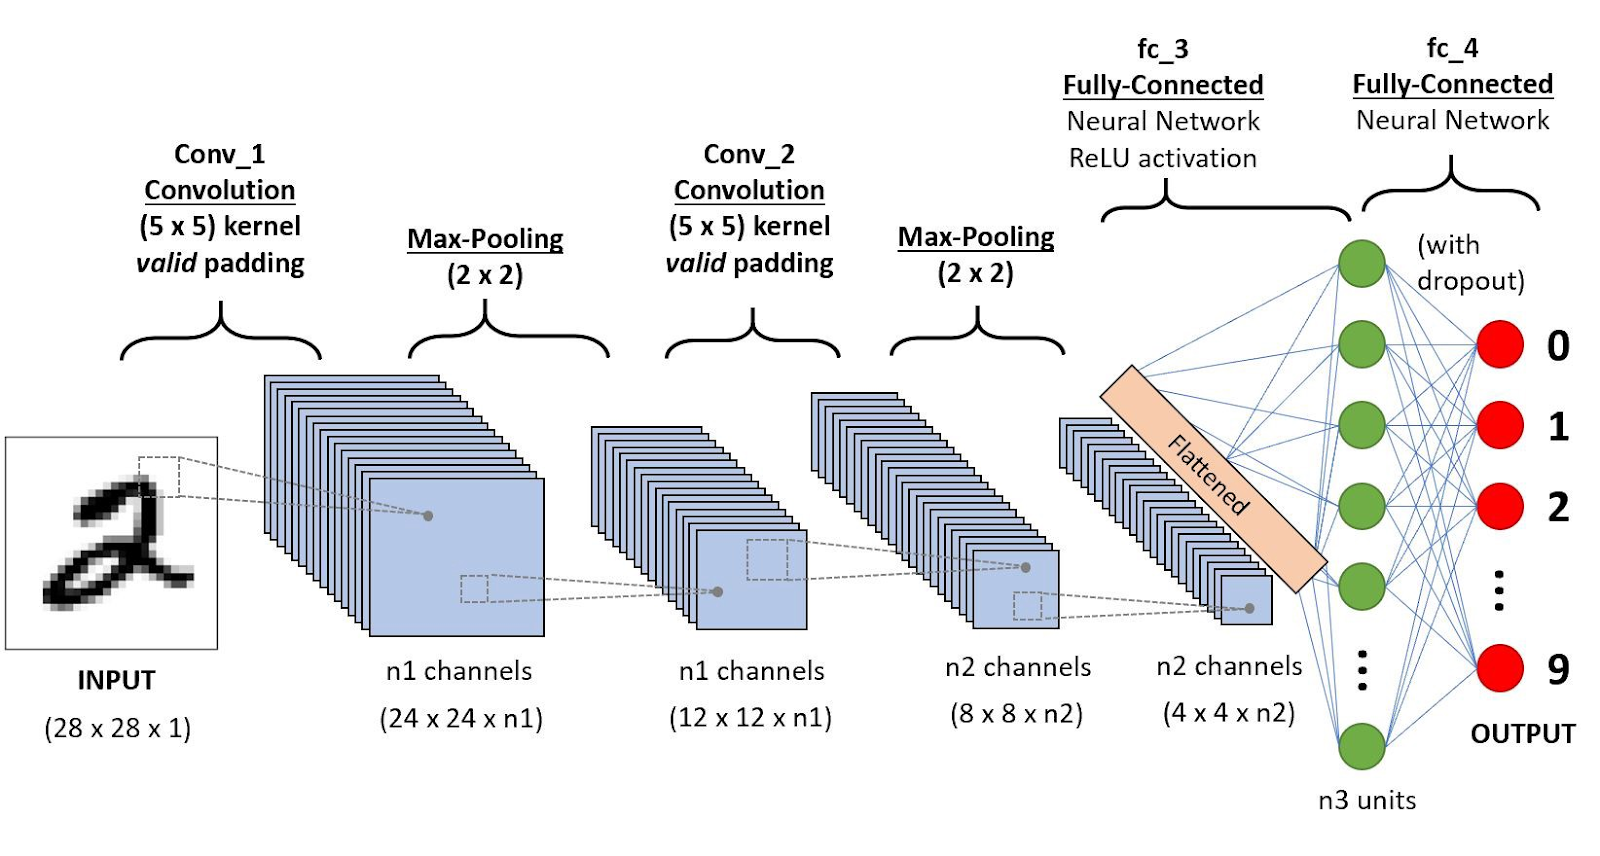

# 2. CNN 실습

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# 정규화 (0~255 → 0~1)
x_train, x_test = x_train / 255.0, x_test / 255.0

,170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# CNN 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),  # 이미지는 3D 텐서이지만, 클래스 분류를 위해 1D 벡터로 변환
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 → 10개 클래스
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
,  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 학습
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 평가
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("CIFAR-10 Test Accuracy:", acc)

Epoch 1/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.3104 - loss: 1.8597 - val_accuracy: 0.4921 - val_loss: 1.4042
,Epoch 2/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.5272 - loss: 1.3184 - val_accuracy: 0.5630 - val_loss: 1.2326
,Epoch 3/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.5845 - loss: 1.1601 - val_accuracy: 0.5921 - val_loss: 1.1480
,Epoch 4/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6232 - loss: 1.0594 - val_accuracy: 0.6411 - val_loss: 1.0299
,Epoch 5/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.6551 - loss: 0.9763 - val_accuracy: 0.6609 - val_loss: 0.9757
,Epoch 6/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6819 - loss: 0.9049 - val_accuracy: 0.6799 - val_loss: 0.9235
,Epoch 7/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.7035 - loss: 0.8520 - val_accuracy: 0.6647 - val_loss: 0.9825
,Epoch 8/10
,625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7216 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


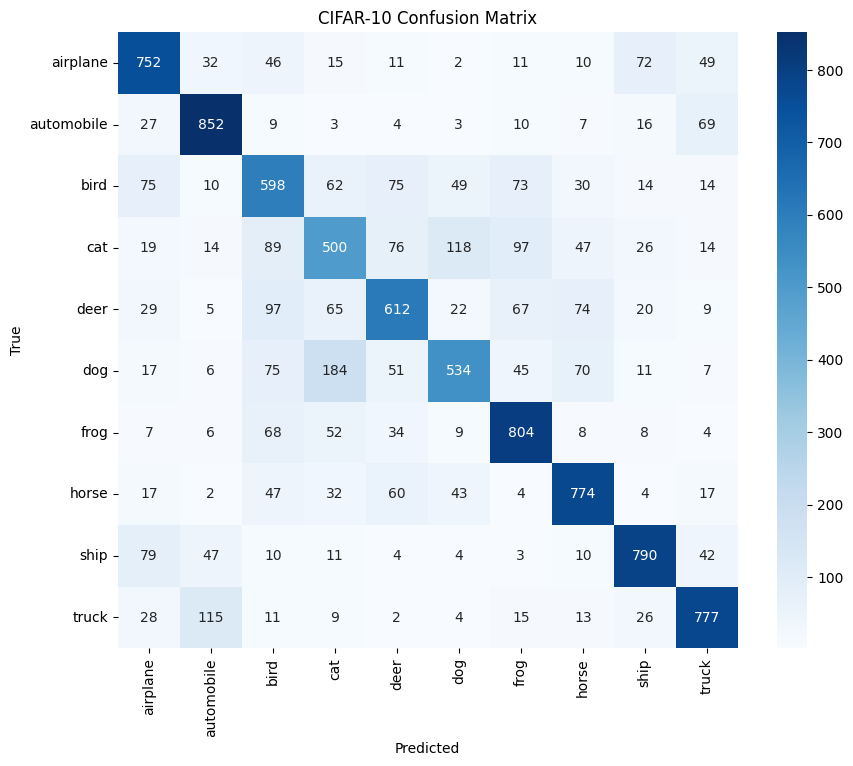

In [ ]:
# 클래스 이름
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# 테스트 데이터 예측
y_pred = np.argmax(model.predict(x_test), axis=1)

# 결과 분석: Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CIFAR-10 Confusion Matrix')
plt.show()

## VGG16
- 기존 CNN 모델들은 주로 Convolution 레이어와 Pooling 레이어를 번갈아 연속적으로 사용하는 것이 일반적
- VGG은 이러한 기존의 틀에서 벗어나 Convolution을 2번 또는 3번 연속해서 쌓은 뒤 Pooling 레이어를 배치하는 새로운 구조를 제시
- VGG16 : 16개의 레이어를 지원하는 VGG 모델

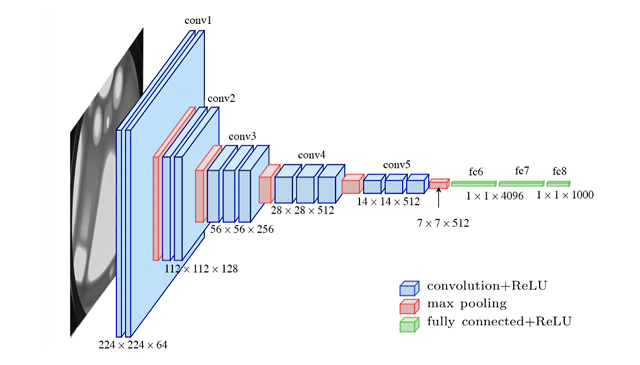

### One-Hot Encoding
- 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
- 원래 라벨 그대로 학습하는 것보다 One-Hot Encoding을 하게 되면 데이터를 처리하기 위해 필요한 메모리 양을 줄일 수 있고 처리를 빠르게 할 수 있음

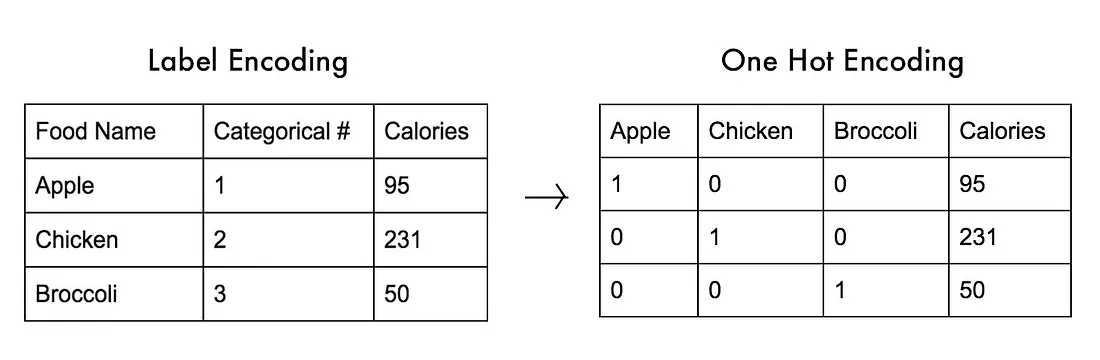


In [ ]:
from tensorflow.keras.utils import to_categorical

# 정답을 원-핫 인코딩 진행
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras.applications import VGG16

# ImageNet으로 사전학습된 VGG16 모델 불러오기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

,58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

# 학습 가능 여부 설정
base_model.trainable = True

# 모델 구성(ImgaeNet이 아닌 CIFAR-10 기준으로 모델 튜닝)
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10: 10 클래스
])

model.compile(optimizer=Adam(learning_rate=1e-4), # 학습률 조정 가능
              loss='categorical_crossentropy', # 정답을 원-핫 인코딩한 경우 'sparse_categorical_crossentropy'가 아닌 categorical_crossentropy 사용
              metrics=['accuracy'])

In [ ]:
# 런타임 유형을 반드시 gpu로 변경한뒤 실행할 것, 그렇지 않으면 많은 시간이 소요됨
# 학습
model.fit(x_train,y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# 평가
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("CIFAR-10 Test Accuracy:", acc)

Epoch 1/5
,625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 66ms/step - accuracy: 0.5953 - loss: 1.1501 - val_accuracy: 0.7617 - val_loss: 0.6778
,Epoch 2/5
,625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step - accuracy: 0.8102 - loss: 0.5409 - val_accuracy: 0.8188 - val_loss: 0.5256
,Epoch 3/5
,625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.8689 - loss: 0.3787 - val_accuracy: 0.8260 - val_loss: 0.5172
,Epoch 4/5
,625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9137 - loss: 0.2519 - val_accuracy: 0.8358 - val_loss: 0.5037
,Epoch 5/5
,625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9397 - loss: 0.1779 - val_accuracy: 0.8425 - val_loss: 0.5187
,CIFAR-10 Test Accuracy: 0.8395000100135803


## ImageNet-1K
-  시각적 개체 인식 소프트웨어 연구에 사용하도록 설계된 대규모 시각적 데이터베이스

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from datasets import load_dataset
from tensorflow.image import resize
import numpy as np
from tensorflow.keras.utils import to_categorical
import random

In [ ]:
# 데이터 불러오기
train = load_dataset("zh-plus/tiny-imagenet", split="train")
test = load_dataset("zh-plus/tiny-imagenet", split="valid")

print("Filtered train samples:", train)
print("Filtered test samples:", test)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
,The secret `HF_TOKEN` does not exist in your Colab secrets.
,To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
,You will be able to reuse this secret in all of your notebooks.
,Please note that authentication is recommended but still optional to access public models or datasets.
,  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

(…)-00000-of-00001-1359597a978bc4fa.parquet:   0%|          | 0.00/146M [00:00<?, ?B/s]

(…)-00000-of-00001-70d52db3c749a935.parquet:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Filtered train samples: Dataset({
,    features: ['image', 'label'],
,    num_rows: 100000
,})
,Filtered test samples: Dataset({
,    features: ['image', 'label'],
,    num_rows: 10000
,})


In [ ]:
# 전체 클래스 확인
all_classes = sorted(list(set(train['label'])))

# 대규모 데이터이기 때문에 그중 사용할 20개 클래스 선택 (무작위)
random.seed(42)
selected_classes = random.sample(all_classes, 20)
print("Selected classes:", selected_classes)

# 선택한 클래스만 필터링
def filter_classes(example):
    return example['label'] in selected_classes

train_20 = train.filter(filter_classes)
test_20 = test.filter(filter_classes)

# 라벨을 0~19로 재매핑
class_to_idx = {cls:i for i, cls in enumerate(selected_classes)}

def remap_labels(example):
    example['label'] = class_to_idx[example['label']]
    return example

train_20 = train_20.map(remap_labels)
test_20 = test_20.map(remap_labels)

print("Filtered train samples:", train_20)
print("Filtered test samples:", test_20)

Selected classes: [163, 28, 6, 189, 70, 62, 57, 35, 188, 26, 173, 139, 22, 151, 108, 8, 7, 23, 55, 59]


Filter:   0%|          | 0/100000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Filtered train samples: Dataset({
,    features: ['image', 'label'],
,    num_rows: 10000
,})
,Filtered test samples: Dataset({
,    features: ['image', 'label'],
,    num_rows: 1000
,})


In [ ]:
# 데이터 준비
def extract_data(dataset):
    images = []
    labels = []
    for item in dataset:
        img = np.array(item['image'].convert('RGB'), dtype='float32')  # RGB로 통일
        images.append(img)
        labels.append(item['label'])
    return np.stack(images), np.array(labels)

x_train, y_train = extract_data(train_20)
x_test, y_test = extract_data(test_20)

In [ ]:
#데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = y_train.astype("int32")
y_test = y_test.astype("int32")

In [ ]:
# 모델(작성)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 학습(작성)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0631 - loss: 2.7759 - val_accuracy: 0.0000e+00 - val_loss: 8.8500
,Epoch 2/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0681 - loss: 2.7699 - val_accuracy: 0.0000e+00 - val_loss: 8.5625
,Epoch 3/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0879 - loss: 2.7566 - val_accuracy: 0.0000e+00 - val_loss: 10.6134
,Epoch 4/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1056 - loss: 2.7352 - val_accuracy: 0.0000e+00 - val_loss: 12.1303
,Epoch 5/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1366 - loss: 2.6969 - val_accuracy: 0.0000e+00 - val_loss: 15.0140
,Epoch 6/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1333 - loss: 2.6787 - val_accuracy: 0.0000e+00 - val_loss: 14.8535
,Epoch 7/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1576 - loss: 2.6402 - val_accuracy: 0.0000e+00 - val_loss: 16.8513
,Epoch 8/10
,125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/s

In [ ]:
# 평가(작성)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("ImageNet-1K 분류 정확도 :", acc)

ImageNet-1K 분류 정확도 : 0.052000001072883606
